# Testing the Aptitude Function

In [22]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri May 27 22:15:13 2022

@author: rodrigo
"""

#Cargando librerías 
import importlib

import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import pandas as pd
import os
import sys  

root = os.getcwd() + "/.."

sys.path.insert(0, root)

import src.positioning_sensors as ps
importlib.reload(ps)

import src.network_fitness as netfit
importlib.reload(netfit)

import src.manageExperiments as me
importlib.reload(me)

import config.config as cfg
importlib.reload(cfg)

from geneticalgorithm import geneticalgorithm as ga

import itertools as it

#read_global_variables

plt.style.use("ggplot")

In [23]:
fn = "linz_with_init_net_exp_2.txt"

setup = me.readConfigFile(fn)


#cargamos imagenes en luminance e importance
ilumina = setup["folder_input"] + setup["input_ntli"]
niveles = setup["folder_input"] + setup["input_evm"]

#coeficientes de suavizado para la imagen nocturna
sigma_y = setup['filterg_sy']
sigma_x = setup['filterg_sx']
sigma = [sigma_y,sigma_x]

#Loading precalculated local and directed empirical variograms
path2output_semivars = (cfg.experiment 
          + setup["experiment_id"]
          + setup["folder_semivariances"]
          + setup["output_semivariances"] 
                       )


filesv = path2output_semivars + ".csv"
filesvmask = path2output_semivars + "mask.csv"

path2optimum_values_file = (cfg.experiment 
                           + setup["experiment_id"] 
                           + setup["folder_output"] 
                           )

saveOptimumValuesTofile = (path2optimum_values_file
                           + setup["output_values"]
                          )

saveArgsTofile = (path2optimum_values_file
                  + setup["output_args"]
                 )

ilumina = cfg.data + setup["folder_input"] + setup["input_ntli"]
niveles = cfg.data + setup["folder_input"] + setup["input_evm"]


In [24]:
data = pd.read_csv(filesv)

In [25]:
data.columns[:6]

Index(['Unnamed: 0', 'coordsy', 'coordsx', '0', '1', '2'], dtype='object')

In [26]:
#loading the mask of the semivariances
data_m = pd.read_csv(filesvmask)

#we select the variograms from the table
variogram_set = np.array(data.iloc[:,3:])

#we select the variogram mask from the table
variogram_set_m = np.array(data_m.iloc[:, 3:])



In [27]:
#we smooth a to remove noice
NTLI = ps.readIMG(ilumina)
FDNTLI = sp.ndimage.gaussian_filter(NTLI,sigma, mode = setup['gaussian_mode'])

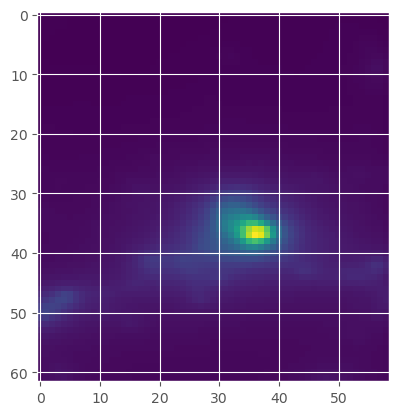

In [28]:
plt.imshow(FDNTLI)

In [29]:
#Environmental Map
EAM = ps.readIMG(niveles, invert = True)

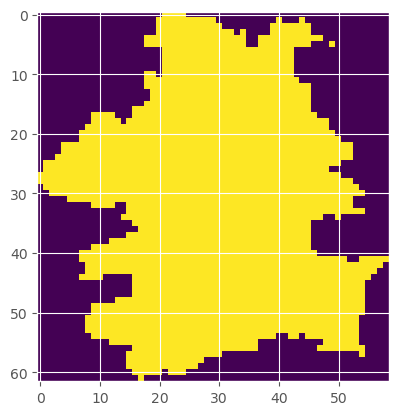

In [30]:
plt.imshow(EAM)